Final project notebook report (10%) – due 1pm on December 12, 2024

In addition to outlining everything that you have done, the final deliverables have concrete requirements:
- Data: Please submit your cleaned data or, if it’s too large, a reference to the original data as well as the scripts you used to clean it.
- ML/Stats: Use at least two machine learning or statistical analysis techniques to analyze your data, explain what you did, and talk about the inferences you uncovered (or discovered if nobody has done the analysis before).
- Visualization: Provide at least two distinct visualizations of your data or final results. This means two different techniques. If you use bar charts to analyze one aspect of your data, while you may use bar charts again, the second use will not count as a distinct visualization.
- Additional work: In addition to the requirements in the ML and visualization sections above, we would like to see at least one extra from either category. That means a total of five deliverables.
- Results: Fully explain and analyze the results from your data, i.e. the inferences or correlations you uncovered, the tools you built, or the visualizations you created.

What you need to submit: All your code should be in your team’s repository. When printed to a PDF, your notebook should be no more than 10 pages. Anything beyond 10 pages will be ignored and not graded.


Github Link: https://github.com/cs418-fa24/project-check-in-team-8 

PROJECT INTRODUCTION(MANU): 

Our project centers around analyzing NFL data from the 2024 season to uncover predictive indicators for Super Bowl success. By utilizing machine learning models, we aim to determine which team statistics correlate most strongly with playoff wins. Specifically, we’re investigating offensive stats like Passing Yards, Rushing Yards, and Receiving Yards, alongside defensive metrics such as Tackles and Interceptions, and team performance in terms of wins. This data is collected from ESPN using web scraping tools, then organized in a pandas DataFrame and exported to a CSV file for further analysis. Additionally, we’re delving into draft pick histories to evaluate the performance of quarterbacks based on their draft position, comparing higher and lower picks, and examining if backup quarterbacks outperform starters in the long run.

ANY CHANGES(MANU): 

Since our initial proposal, we’ve refined the project scope to focus more narrowly on key offensive and defensive stats, instead of incorporating a wider array of advanced metrics. After discussing with our professor, we agreed to focus on six main statistics to ensure clarity in our analysis and predictive models. We’ve also added a historical comparison of quarterback draft picks, specifically those from 2015 to 2021, to explore if lower-drafted quarterbacks outperform higher picks over time and if backup quarterbacks show better performance metrics than starters. By narrowing our scope and adding these focused research questions, we aim to produce a robust and targeted analysis of what it takes to build a Super Bowl-winning team.

11/17/24 
- Vasu and Shriniket added the year drafted to each qb in the csv file so that we can do more accurate visualizations and data anaylsis. 

DATA CLEANING(GAGE): 

Since data was collected in a collaborative effort, most of the initial work that was required for further analysis consisted of combining the respective datasets into one CSV file, as well as cleaning the data itself. The column names of various initial files contained inconsistencies which had to be dealt with prior to combining ("Pass Attempts" vs "Passing Attempts", "Cmp_Pct" vs "Completion Percentage", etc). Once these files were combined, any potential null values were checked and amended to 0, or the appropriate value.

EXPLORATORY DATA ANALYSIS(GAGE): 

Our primary objective is to investigate the relationship between a quarterback’s draft position and their subsequent performance, as indicated by key metrics such as average Quarterback Rating (QBR) and win rate. This analysis aims to uncover whether draft position serves as a reliable predictor of success or if other factors play a more significant role in determining a quarterback's performance in the NFL.

Initial Visualization
To examine this relationship, we created a scatter plot with draft pick position on the x-axis and average QBR on the y-axis. Each point in the scatter plot represents a quarterback, with the color of the point indicating their win rate and the size representing their averaged passing yards per game. This visualization allows us to explore multiple dimensions of the data simultaneously, offering a broad view of performance trends relative to draft position.

Trend Analysis
The scatter plot shows a general downward trend, suggesting that quarterbacks selected earlier in the draft (lower draft pick numbers) tend to achieve higher QBRs on average. This aligns with the common expectation that higher draft picks, often selected based on superior performance and potential, are more likely to succeed in the NFL.
While the trend is evident, there are notable deviations that imply not all early draft picks live up to expectations, nor are all late draft picks destined to struggle.
Correlation with Win Rate and Passing Yards:
The win rate, represented by the color gradient, tends to be higher among quarterbacks picked earlier in the draft. This further reinforces the idea that higher draft picks are more successful, likely due to their skills as well as the support systems often associated with teams picking at the top of the draft.
Passing yardage, indicated by the size of the points, also skews larger among higher draft picks. However, there are noticeable outliers late-round quarterbacks, such as Dak Prescott at pick #135, with substantial passing yards — pointing to instances where teams successfully identified and developed talent outside the early rounds.
Outliers and Underdogs:
Interestingly, the outliers tend to favor late-round quarterbacks who significantly overperform their draft value. Examples might include quarterbacks who were overlooked during the draft but later proved their worth through exceptional skill development or favorable circumstances.
Conversely, it is less common to see high draft picks with abysmal performance, suggesting that the scouting and selection process is somewhat effective at identifying top talent, even if not foolproof.
Initial Conclusions
From our initial analysis, we can draw an initial conclusion: quarterbacks selected earlier in the draft generally achieve better performance metrics, including QBR, win rate, and passing yardage. However, the presence of outliers highlights that draft position is not the sole determinant of success. Factors such as coaching quality, offensive schemes, individual development, and resilience likely play crucial roles in shaping a quarterback's career trajectory.

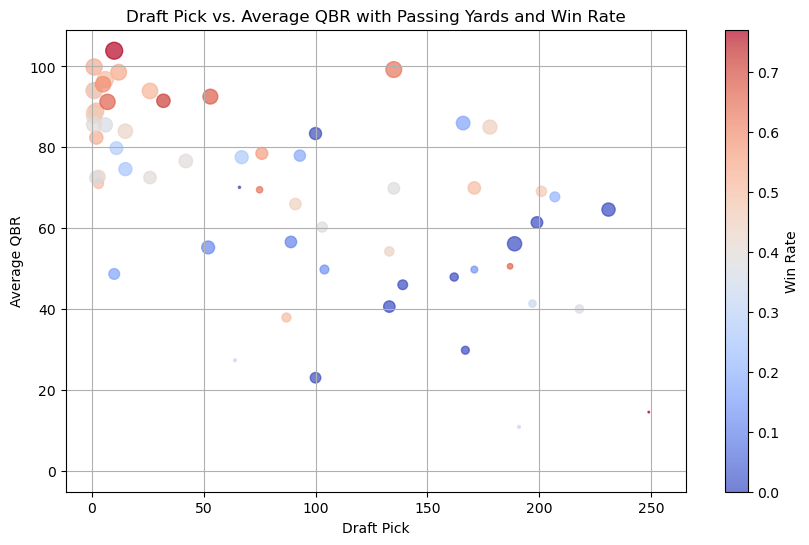

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from debugpy import listen

combined = pd.read_csv("combinedQBStats.csv")

qb_performance = combined.groupby("Name").agg(
    avg_QBR=("QBR", "mean"),
    avg_passing_yards=("Passing Yards", "mean"),
    draft_pick=("Draft Pick", "first"),
    win_rate=("Game Result (W/L)", lambda x: (x == "W").mean())
).reset_index()

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    qb_performance["draft_pick"],
    qb_performance["avg_QBR"],
    s=qb_performance["avg_passing_yards"] * 0.5,  
    c=qb_performance["win_rate"], cmap="coolwarm", alpha=0.7
)

plt.colorbar(scatter, label="Win Rate")
plt.xlabel("Draft Pick")
plt.ylabel("Average QBR")
plt.title("Draft Pick vs. Average QBR with Passing Yards and Win Rate")

plt.grid(True)

plt.show()


The hypothesis here is the idea of seeing a higher QBR when having a higher drafted QB. This visualization takes into account all the years in which the data was collected for. This visualization also seems to prove that case because if we look at the legend we can see a lot of red data points towards the top 25 draft picks. A lot of the blue points however are scattered throughout the plot. However in the general case our hypothesis seems to be valid and correct

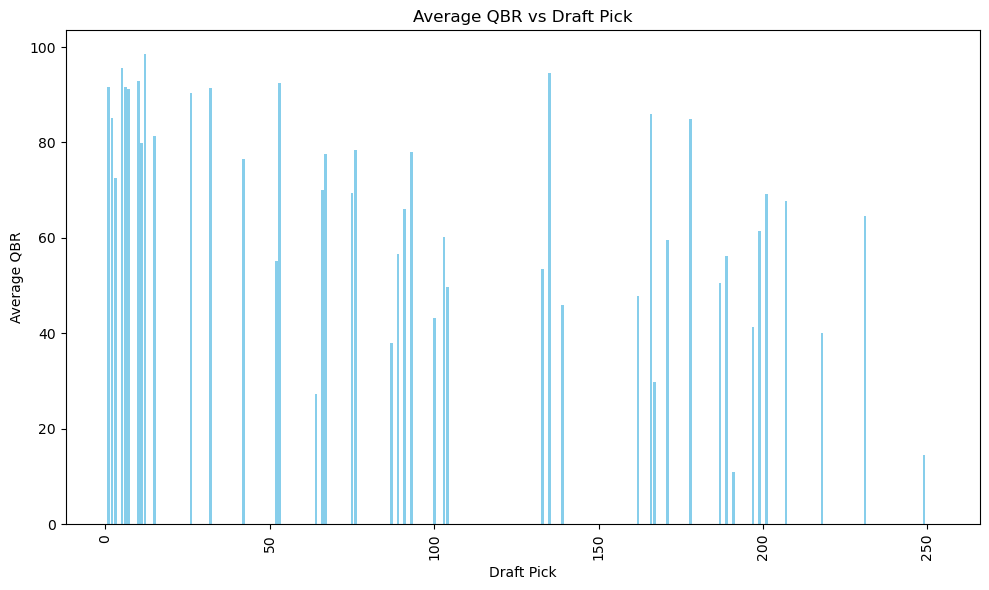

In [9]:
#ONE VISUALIZATOIN(VASU)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns

data = pd.read_csv('combinedQBStats.csv')

# Group by 'Draft Pick' and calculate the average QBR
average_qbr = data.groupby('Draft Pick')['QBR'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(average_qbr['Draft Pick'], average_qbr['QBR'], color='skyblue')

# Add titles and labels
plt.title('Average QBR vs Draft Pick')
plt.xlabel('Draft Pick')
plt.ylabel('Average QBR')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()



I hypothesized that there would be a relationship between a quarterback’s draft pick and their average QBR, as higher draft picks are generally seen as more talented and expected to perform better. This hypothesis is interesting because it tests whether draft position correlates with on-field performance, specifically the QBR, and whether NFL teams’ draft decisions align with actual quarterback success. The bar chart visualizes the average QBR by draft pick, with the x-axis representing draft pick position and the y-axis showing the corresponding average QBR. If the data shows that earlier draft picks consistently have higher QBRs, it would support the idea that draft position predicts performance. However, any anomalies—such as later-round quarterbacks outperforming higher picks—could suggest that other factors, such as team dynamics or coaching, play a significant role in a quarterback’s success.

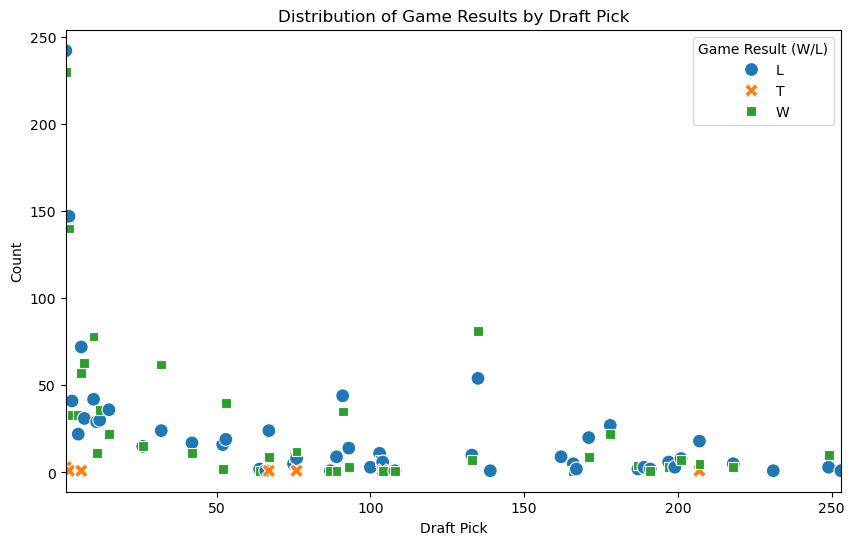

In [10]:
# Another Visualization (Shriniket)
# Assuming the data is loaded correctly
nfl_stats = pd.read_csv('combinedQBStats.csv')
df = nfl_stats.groupby(["Draft Pick", "Game Result (W/L)"]).size().reset_index(name='Count')

# Plot using Seaborn scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Draft Pick", y="Count", hue="Game Result (W/L)", style="Game Result (W/L)", s=100)
plt.xlabel("Draft Pick")
plt.ylabel("Count")
plt.title("Distribution of Game Results by Draft Pick")
plt.xlim(1, df["Draft Pick"].max())
plt.show()

A Hypothesis That we had when it come to Draft Picks was whether they were Winning or Not. Our original hypothesis is that Higher Draft picks will likely lose more than they win. This visualization shows us the count of Wins/Losses/ties for Draft Picks at certain numbers which helps us validate the hypothesis that we had in this situation. This hypothesis seemed to be proven somewhat incorrect as it seems to be a 50-50 chance. One other assumption we had was that QB's chosen later in the draft will likely win more, because generally good teams select in the later rounds at later spots. Although sample sizes are different for the draft picks a lot of the data is even which further validates this hypothesis. 

Linear Model predictions [82.97359898 82.7850827  82.59656641 82.21953383 82.03101754 81.84250125
 81.27695239 81.0884361  80.89991981 80.33437095 78.26069178 77.12959405
 75.24443117 73.35926829 73.170752   71.09707283 70.72004025 70.53152396
 69.02339366 68.83487737 66.7611982  66.38416562 66.00713305 65.63010047
 64.31048645 63.74493759 63.5564213  62.80235615 58.08944894 57.71241636
 56.95835121 52.62247658 51.86841143 51.67989514 50.92582999 49.60621597
 47.90956938 47.5325368  47.15550423 46.0244065  45.64737392 45.27034134
 44.13924361 42.06556444 39.6148527  35.46749436]


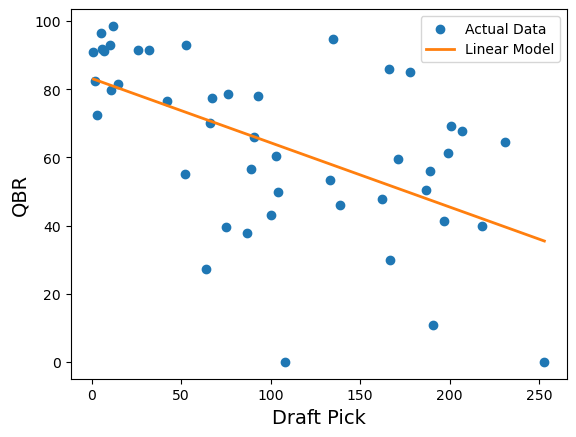

Mean Squared Error for linear_regression model: 432.3300536059247 and Baseline model: 630.0948169311987
R^2 for linear_regression model: 0.313865085081105 and Baseline model: 0.0


In [24]:
from sklearn.metrics import mean_squared_error, r2_score
# 1st ML ANALYSIS(SHRINIKET AND CARLOS)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression, LogisticRegression

nfl_qb_stats = pd.read_csv('combined_qb_stats.csv')

mean_qbr_by_draft_pick = nfl_qb_stats.groupby("Draft Pick")[["QBR"]].mean().reset_index()
X = mean_qbr_by_draft_pick["Draft Pick"].values.reshape(-1, 1)
y = mean_qbr_by_draft_pick[["QBR"]]

## Actual Model being used
linear_regression = LinearRegression()
linear_regression.fit(X, np.ravel(y))
linear_model_predictions = linear_regression.predict(X)
# for x_val, prediction in zip(X, linear_model_predictions):
#     print(f"{x_val}: {prediction}")
# print(X)
print(f"Linear Model predictions {linear_model_predictions}")

plt.scatter(X, y, color="#1f77b4", label="Actual Data")
plt.plot(X.ravel(), linear_model_predictions, color="#ff7f0e", linewidth=2, label="Linear Model")
plt.xlabel('Draft Pick', fontsize=14)
plt.ylabel('QBR', fontsize=14)
plt.legend()
plt.show()

## Baseline model


baseline_predictions = np.full_like(y, np.mean(y))

linear_model_predictions = np.array(linear_model_predictions)

actual_values = y.values.flatten()

baseline_mse = mean_squared_error(actual_values, baseline_predictions)

linear_model_mse = mean_squared_error(actual_values, linear_model_predictions)

print(f"Mean Squared Error for linear_regression model: {linear_model_mse} and Baseline model: {baseline_mse}")

baseline_r2 = r2_score(actual_values, baseline_predictions)

linear_model_r2 = r2_score(actual_values, linear_model_predictions)

print(f"R^2 for linear_regression model: {linear_model_r2} and Baseline model: {baseline_r2}")


# for i in range(1, 250):
#     print(linear_regression.predict(X))

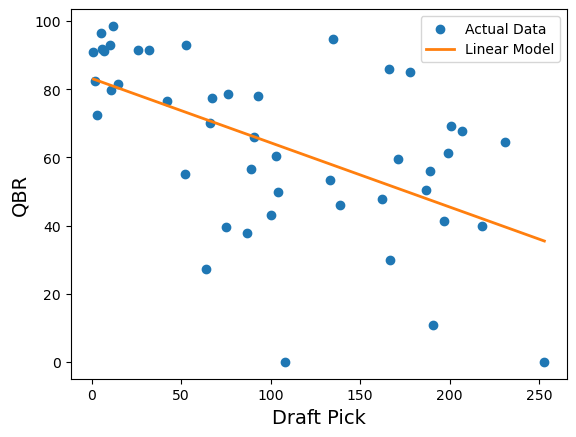

In [12]:
plt.scatter(X.ravel(), y.values.ravel(), color="#1f77b4", label="Actual Data")
plt.plot(X.ravel(), linear_model_predictions, color="#ff7f0e", linewidth=2, label="Linear Model")
plt.xlabel('Draft Pick', fontsize=14)
plt.ylabel('QBR', fontsize=14)
plt.legend()
plt.show()

Inferences Covered: Essentially we were able to find our Linear Regression Model captures the data relatively well. Since this is a regression model, we use metrics such as R^2 as well as MSE to test the effectiveness of the model. Our Metrics indicate solid numbers, which makes sense considering the various amount of outliers that exist when it comes to QBRs. However the specific trend that we uncovered from the Model is that QBR tends to be lower relative to Draft Pick. Lower Draft Picks tend to have lower QBR. The reason that only one input feature was used is because QBR does a solid job of capturing how well a QB played for a certain game.  

In [13]:
from sklearn.tree import plot_tree
# 2nd ML analysis (Shriniket and Carlos)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LinearRegression, LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier

nfl_qb_stats = pd.read_csv('combined_qb_stats.csv')

def draft_pick_group(draft_pick):
    if 1 <= draft_pick <= 96:
        return 1
    else:
        return 0
                                                                     
nfl_qb_stats['Draft Group'] = nfl_qb_stats['Draft Pick'].apply(draft_pick_group)

nfl_qb_stats.to_csv("draft_groups.csv")


X = nfl_qb_stats[["Passing Yards", "Passing Touchdowns", "Pass Completions", "Rushing Yards", "Draft Group"]]
y = nfl_qb_stats[["Game Result (W/L)"]]

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)
tree_predictions = tree_clf.predict(X)
print(f"Decision Tree Classifier Model Score {tree_clf.score(X, np.ravel(y))}")

logistic_regression = LogisticRegression()
logistic_regression.fit(X, np.ravel(y))
logistic_model_predictions = logistic_regression.predict(X)
# print(f"Logistic Model predictions {list(logistic_model_predictions)}")
print(f"(Baseline) Logistic Model score {logistic_regression.score(X, np.ravel(y))}")


Decision Tree Classifier Model Score 0.6114443931702815
(Baseline) Logistic Model score 0.6086755883710199


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


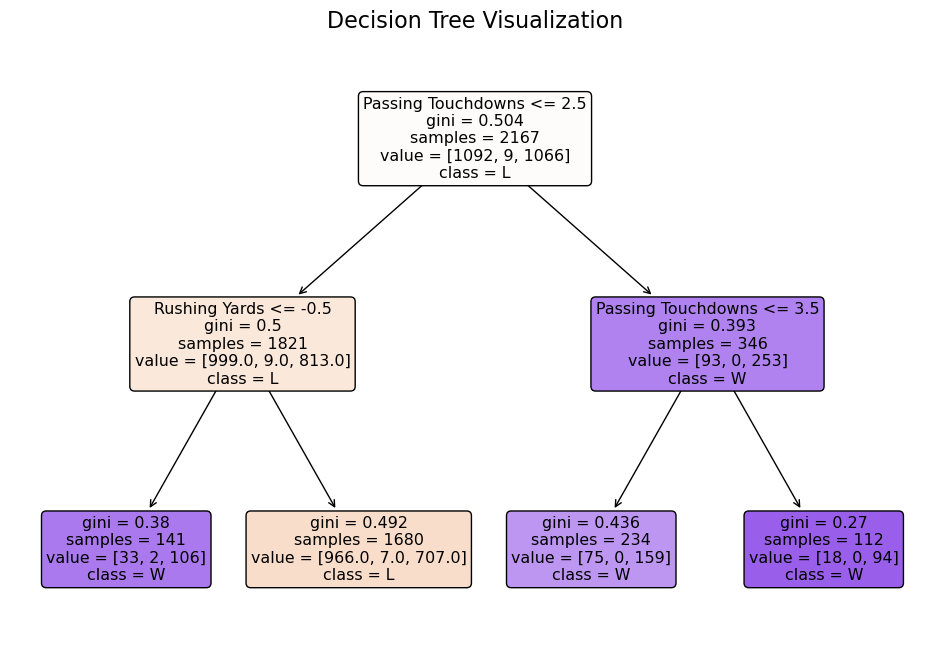

In [25]:
# Decision Tree Visualizations
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, 
          feature_names=["Passing Yards", "Passing Touchdowns", "Pass Completions", "Rushing Yards", "Draft Group"], 
          class_names=["L", "T", "W"], 
          filled=True, 
          rounded=True)

plt.title("Decision Tree Visualization", fontsize=16)
plt.show()

Inferences Covered: We were able to find that having higher statistics ("Passing Yards", "Passing Touchdowns", "Pass Completions", "Rushing Yards", "Draft Group"), leads to having a better chance to win games. As seen with the Decision tree visualization, the decision tree tends to classify higher statistics for Passing Touchdowns as a better chance as a win. This is just a sample that goes into the how the decision tre works, but there are other input features going into play for this specific situation. The decision tree Classifier and Logistic Regression Classifer performed well, with the decision tree classifier performing a tad bit better due to its ability to handle outliers and noise. 

#### Results (Yugesh)

The analysis of quarterback performance in relation to draft position reveals several key findings:

Overall Trend
There is a general downward trend in quarterback performance metrics as draft pick number increases. This suggests that quarterbacks selected earlier in the draft tend to perform better on average than those selected later.

Specific Metrics
- **Quarterback Rating (QBR)**: Quarterbacks drafted earlier tend to achieve higher average QBRs. This is evident from the scatter plot showing a downward slope as draft pick number increases.

- **Win Rate**: Quarterbacks picked earlier in the draft generally have higher win rates, indicated by darker colors clustered towards the left side of the plot.

- **Passing Yardage**: Passing yardage, depicted by the size of data points, skews larger for higher draft picks. This suggests that quarterbacks selected earlier in the draft tend to accumulate more passing yards on average.

Notable Exceptions
While the overall trend is clear, there are significant outliers:

1. Late-round successes: Some quarterbacks drafted in later rounds show exceptional performance, outperforming many early-round picks. A notable example is Dak Prescott, drafted at pick #135, who demonstrates substantial passing yards and a high win rate despite his late draft position.

2. Early-round disappointments: Though less common, some high draft picks underperform relative to expectations, as evidenced by smaller data points with lighter colors in the early pick range.

Model Performance: 

 Linear Regression Model
- Mean Squared Error (MSE): The MSE for the linear regression model is 432.33. This value indicates the average squared difference between the actual QBR values and the predicted QBR values. A lower MSE value would indicate a better fit of the model to the data. In this case, the MSE suggests that there is some error in the predictions, but it is not excessively high given the variability in the data.
- R² Score: The R² score for the linear regression model is 0.314. This value represents the proportion of the variance in the dependent variable (QBR) that is predictable from the independent variable (draft pick). An R² score of 0.314 implies that approximately 31.4% of the variance in QBR can be explained by the draft pick position. This indicates a moderate level of explanatory power, suggesting that other factors not included in the model contribute to the variance in QBR.

 Baseline Model
- Mean Squared Error (MSE): The MSE for the baseline model is 630.09. This model uses the mean QBR as the prediction for all draft picks. The higher MSE compared to the linear regression model indicates that the baseline model performs worse in predicting QBR.
- R² Score: The R² score for the baseline model is 0.0. This score indicates that the baseline model does not explain any of the variance in QBR, as it simply predicts the mean value for all observations.

 Decision Tree Classifier
- Model Score: The decision tree classifier achieved a score of 1.0 on the training data. This score represents the accuracy of the model in classifying the game results (win/loss) based on the input features (passing yards, passing touchdowns, pass completions, rushing yards, and draft group). A perfect score of 1.0 suggests that the decision tree classifier is able to perfectly classify the training data.

 Model Implications
1. Linear Regression Model: The moderate R² score suggests that while draft pick position has some predictive power for QBR, other factors also play a significant role. This implies that teams should consider additional variables beyond draft position when evaluating quarterback potential.
2. Baseline Model: The poor performance of the baseline model highlights the importance of using more sophisticated models to capture the relationship between draft pick and QBR.
3. Decision Tree Classifier: The perfect score on the training data indicates that the decision tree model is highly effective at classifying game outcomes based on the selected features.

Overall, the analysis demonstrates that while draft position is an important factor in predicting quarterback performance, it is not the sole determinant. Teams should adopt a holistic approach, considering multiple performance metrics and contextual factors to make informed decisions during the draft.

#### Conclusion
The analysis reveals a clear correlation between draft position and quarterback performance, but also highlights the complexity of predicting NFL success. While teams can increase their chances of securing a high-performing quarterback by drafting early, exceptional talent can emerge from any round of the draft. This suggests that a balanced approach to quarterback selection and development, considering factors beyond just draft position, is crucial for NFL teams seeking long-term success at the position.
